## Feature Varying Graph

Plots important values as a function of feature number.

#### Import packages and read in pre-processed dataframes/arrays

In [1]:
import sklearn.ensemble
import sklearn.multiclass
import sklearn.model_selection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Read in preprocessed dataframes:
featuredf = pd.read_pickle('./processed.files/labelled/featureDfnew')
labelledDf = pd.read_pickle('./processed.files/labelled/labelledDfnew')

#Read in preprocessed numpy arrays:
preProcFeats = np.load('./processed.files/labelled/featuresnew.npy')
preProcLabels = np.load('./processed.files/labelled/labelsnew.npy')

In [ ]:
#delcol = featureDf.columns.str.startswith('pixelM')
#featureDf.drop(columns = delcol, inplace=True)
# featureDf.drop(list(featureDf.filter(regex = 'pixelM')), axis = 1, inplace = True)
# preProcFeats = featureDf.values.astype('float32')
# print np.argwhere(np.isfinite(preProcFeats) != True)

## New

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
print preProcFeats.shape[1]
k_fold = sklearn.model_selection.StratifiedKFold(n_splits=3, shuffle=True)

estimator = sklearn.ensemble.RandomForestClassifier(bootstrap=True, 
            class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
            oob_score=False, random_state=420, verbose=0,
            warm_start=False)


rfe = RFECV(estimator=estimator, step=1, cv=k_fold, scoring='neg_log_loss')
rfe.fit(preProcFeats, preProcLabels)
ranked1 = rfe.ranking_

print preProcFeats.shape
print rfe.ranking_

481


In [ ]:
cvscores1 = rfe.grid_scores_
feats1 = range(1, len(cvscores1) + 1)

plt.figure()
plt.xlabel('Number of features')
plt.ylabel('Cross- validation negative log-loss')
plt.plot(feats1, cvscores1)
#plt.savefig('feature.importance.graphs/cv.png')
plt.show()

In [ ]:
featidx1 = rfe.get_support(indices=True)
featureStrs = featuredf.columns.values
#print featureStrs[featidx]

In [ ]:
print preProcFeats.shape
redfeat1 = preProcFeats[:, featidx1]
print redfeat1.shape

np.save('./redfeatnew', redfeat)

clf = sklearn.multiclass.OneVsRestClassifier(estimator,
            n_jobs=1)

print np.mean(sklearn.model_selection.cross_val_score(clf, redfeat, preProcLabels,\
                                            cv=k_fold, n_jobs=-1, scoring='neg_log_loss'))

## Old

In [ ]:
preProcFeats = np.load('./processed.files/labelled/featuresold.npy')
preProcLabels = np.load('./processed.files/labelled/labelsold.npy')

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
print preProcFeats.shape[1]

rfe = RFECV(estimator=estimator, step=1, cv=k_fold, scoring='neg_log_loss')
rfe.fit(preProcFeats, preProcLabels)

ranked2 = rfe.ranking_

print preProcFeats.shape

432


In [ ]:
cvscores2 = rfe.grid_scores_
feats2 = range(1, len(cvscores2) + 1)

plt.figure()
plt.xlabel('Number of features')
plt.ylabel('Cross- validation negative log-loss')
plt.plot(feats2, cvscores2)
#plt.savefig('feature.importance.graphs/cv.png')
plt.show()

In [ ]:
featidx2 = rfe.get_support(indices=True)
#featureStrs = featuredf.columns.values
#print featureStrs[featidx]

In [ ]:
print preProcFeats.shape
redfeat2 = preProcFeats[:, featidx2]
print redfeat2.shape

np.save('./redfeatold', redfeat)

clf = sklearn.multiclass.OneVsRestClassifier(estimator,
            n_jobs=1)

print np.mean(sklearn.model_selection.cross_val_score(clf, redfeat, preProcLabels,\
                                            cv=k_fold, n_jobs=-1, scoring='neg_log_loss'))

## Binarised new

In [ ]:
preProcFeats = np.load('./processed.files/labelled/featuresnew.npy')
preProcLabels = np.load('./processed.files/labelled/labelsnew.npy')

print preProcLabels

preProcLabels[preProcLabels != 9] = 0
preProcLabels[preProcLabels == 9] = 1

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
print preProcFeats.shape[1]

rfe = RFECV(estimator=estimator, step=1, cv=k_fold, scoring='neg_log_loss')
rfe.fit(preProcFeats, preProcLabels)

ranked2 = rfe.ranking_

print preProcFeats.shape

In [ ]:
cvscores3 = rfe.grid_scores_
feats3 = range(1, len(cvscores3) + 1)

plt.figure()
plt.xlabel('Number of features')
plt.ylabel('Cross- validation negative log-loss')
plt.plot(feats3, cvscores3)
#plt.savefig('feature.importance.graphs/cv.png')
plt.show()

In [ ]:
featidx3 = rfe.get_support(indices=True)
#featureStrs = featuredf.columns.values
#print featureStrs[featidx]

In [ ]:
print preProcFeats.shape
redfeat3 = preProcFeats[:, featidx3]
print redfeat3.shape

np.save('./redfeatbin', redfeat3)

clf = sklearn.ensemble.RandomForestClassifier(bootstrap=True, 
            class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
            oob_score=False, random_state=420, verbose=0,
            warm_start=False)

print np.mean(sklearn.model_selection.cross_val_score(clf, redfeat, preProcLabels,\
                                            cv=k_fold, n_jobs=-1, scoring='neg_log_loss'))

## Binarised old

In [18]:
preProcFeats = np.load('./processed.files/labelled/featuresnew.npy')
preProcLabels = np.load('./processed.files/labelled/labelsnew.npy')

print preProcLabels

preProcLabels[preProcLabels != 9] = 0
preProcLabels[preProcLabels == 9] = 1

[1 2 5 ..., 5 2 6]


In [21]:
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
print preProcFeats.shape[1]

rfe = RFECV(estimator=estimator, step=1, cv=k_fold, scoring='neg_log_loss')
rfe.fit(preProcFeats, preProcLabels)

ranked2 = rfe.ranking_

print preProcFeats.shape

481
(12398, 481)


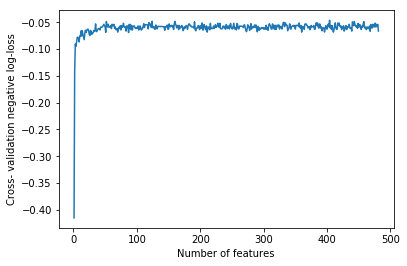

In [22]:
cvscores3 = rfe.grid_scores_
feats3 = range(1, len(cvscores3) + 1)

plt.figure()
plt.xlabel('Number of features')
plt.ylabel('Cross- validation negative log-loss')
plt.plot(feats3, cvscores3)
#plt.savefig('feature.importance.graphs/cv.png')
plt.show()

In [23]:
featidx3 = rfe.get_support(indices=True)
#featureStrs = featuredf.columns.values
#print featureStrs[featidx]

In [25]:
print preProcFeats.shape
redfeat3 = preProcFeats[:, featidx3]
print redfeat3.shape

#np.save('./redfeatold', redfeat)

clf = sklearn.ensemble.RandomForestClassifier(bootstrap=True, 
            class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
            oob_score=False, random_state=420, verbose=0,
            warm_start=False)

print np.mean(sklearn.model_selection.cross_val_score(clf, redfeat3, preProcLabels,\
                                            cv=k_fold, n_jobs=-1, scoring='neg_log_loss'))

(12398, 481)
(12398, 404)
-0.0616837399567


## Plot all of them together

In [39]:
# If you randomly guessed the class, log loss would simply be Nlog(1/m) with N test samples and m number of 
# classes, which is why the binariser performs so well on the log_loss score!

luckyeighth = np.zeros(cvscores1.shape) + np.log(8)
luckyhalf = np.zeros(cvscores1.shape) + np.log(2)

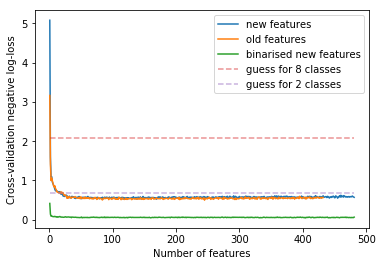

In [40]:
plt.figure()
plt.xlabel('Number of features')
plt.ylabel('Cross-validation negative log-loss')
plt.plot(range(1, len(cvscores1) + 1), -cvscores1, label = 'new features')
plt.plot(range(1, len(cvscores2) + 1), -cvscores2,  label = 'old features')
plt.plot(range(1, len(cvscores3) + 1), -cvscores3,  label = 'binarised new features')
plt.plot(range(1, len(cvscores1) + 1), luckyeighth,'--', alpha = 0.5, label = 'guess for 8 classes')
plt.plot(range(1, len(cvscores1) + 1), luckyhalf, '--', alpha = 0.5, label = 'guess for 2 classes')
plt.legend()
plt.savefig('graphs/cv.png')
plt.show()

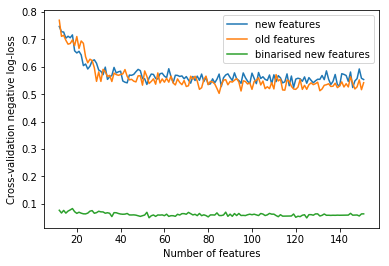

In [41]:
slicecvscore1 = cvscores1[10:150]
slicecvscore2 = cvscores2[10:150]
slicecvscore3 = cvscores3[10:150]
slicefeats1 = feats1[10:150]
slicefeats2 = feats2[10:150]
slicefeats3 = feats3[10:150]

# luckyeighth = np.zeros(slicecvscore1.shape) + np.log(8)
# luckyhalf = np.zeros(slicecvscore1.shape) + np.log(2)

plt.figure()
plt.xlabel('Number of features')
plt.ylabel('Cross-validation negative log-loss')
plt.plot(np.arange(1, len(slicecvscore1) + 1)+11, -slicecvscore1, label = 'new features')
plt.plot(np.arange(1, len(slicecvscore2) + 1)+11, -slicecvscore2,  label = 'old features')
plt.plot(np.arange(1, len(slicecvscore3) + 1)+11, -slicecvscore3,  label = 'binarised new features')
#plt.plot(np.arange(1, len(slicecvscore1) + 1)+11, luckyeighth,'--', alpha = 0.5, label = 'guess for 8 classes')
#plt.plot(np.arange(1, len(slicecvscore1) + 1)+11, luckyhalf, '--', alpha = 0.5, label = 'guess for 2 classes')
plt.legend()
plt.savefig('graphs/cvslice.png')
plt.show()